<a href="https://colab.research.google.com/github/siddharth9238/Machine_Learning_Projects/blob/main/H1N1_vaccination%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""1.)Import necessary libraries: pandas, NumPy, matplotlib, seaborn, and sklearn.
2.)Load the dataset from the given URL using pandas.
3.Perform exploratory data analysis to get an overview of the dataset.
4.Handle missing values by dropping the rows with missing values.
5.Select the features and target variables.
6.Split the dataset into training and testing sets using the train_test_split() function from sklearn.
7.Build a logistic regression model using the LogisticRegression() function from sklearn.
8.Evaluate the model using classification_report() function from sklearn.
9.Plot the distribution of the target variable using seaborn's countplot() function.
""""""

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [9]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,2,1,1,0,0,0.0,0.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3,0,0,0,0,0,2,2.0,0.0,1
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,3,1,0,1,0,1,0,0.0,0.0,0
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,1,0,0,1,0,0,2.0,0.0,1


In [ ]:
df.shape

(11794, 34)

In [ ]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                    int64
qualification                  int64
race                           int64
sex                            int64
income_level                   int64
m

In [ ]:
df.sample(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
6042,6042,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3,0,1,0,0,0,0,1.0,1.0,1
15146,15146,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,0,0,1,1,1,1,3.0,0.0,0
4904,4904,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3,1,0,0,0,1,0,1.0,0.0,1
12133,12133,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,3,0,1,0,0,1,1,1.0,0.0,1
11670,11670,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3,0,0,1,0,0,2,3.0,3.0,0


In [ ]:
df["age_bracket"]

0        3
1        1
7        2
9        3
10       2
        ..
26697    4
26699    2
26701    0
26703    0
26706    4
Name: age_bracket, Length: 11794, dtype: int64

In [ ]:
# Exploratory Data Analysis
print(df.head())
print(df.describe())

   unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          0         1.0             0.0                   0.0   
1          1         3.0             2.0                   0.0   
2          2         1.0             1.0                   0.0   
3          3         1.0             1.0                   0.0   
4          4         2.0             1.0                   0.0   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                0.0               0.0                    0.0   
1                1.0               0.0                    1.0   
2                1.0               0.0                    0.0   
3                1.0               0.0                    1.0   
4                1.0               0.0                    1.0   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  ...  \
0                     0.0                        1.0               1.0  ...   
1                     0.0                        1.0  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11794 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  11794 non-null  int64  
 1   h1n1_worry                 11794 non-null  float64
 2   h1n1_awareness             11794 non-null  float64
 3   antiviral_medication       11794 non-null  float64
 4   contact_avoidance          11794 non-null  float64
 5   bought_face_mask           11794 non-null  float64
 6   wash_hands_frequently      11794 non-null  float64
 7   avoid_large_gatherings     11794 non-null  float64
 8   reduced_outside_home_cont  11794 non-null  float64
 9   avoid_touch_face           11794 non-null  float64
 10  dr_recc_h1n1_vacc          11794 non-null  float64
 11  dr_recc_seasonal_vacc      11794 non-null  float64
 12  chronic_medic_condition    11794 non-null  float64
 13  cont_child_undr_6_mnths    11794 non-null  flo

In [ ]:
df['h1n1_worry']

0        1.0
1        3.0
7        1.0
9        2.0
10       2.0
        ... 
26697    1.0
26699    2.0
26701    2.0
26703    1.0
26706    0.0
Name: h1n1_worry, Length: 11794, dtype: float64

In [10]:
df['h1n1_worry']=df['h1n1_worry'].replace({0:"Not_at_all_concerned", 1:"Not_very_concerned", 2:"Somewhat_concerned"})

In [ ]:
df['h1n1_worry']

0          Not_very_concerned
1                         3.0
7          Not_very_concerned
9          Somewhat_concerned
10         Somewhat_concerned
                 ...         
26697      Not_very_concerned
26699      Somewhat_concerned
26701      Somewhat_concerned
26703      Not_very_concerned
26706    Not_at_all_concerned
Name: h1n1_worry, Length: 11794, dtype: object

In [ ]:
df.describe()

,unique_id,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000,...,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000
mean,13374.787858,1.272596,0.053841,0.731474,0.068509,0.821859,0.331694,0.312193,0.679159,0.250127,...,2.584619,0.406732,0.547651,0.462439,0.242835,0.498898,0.839834,0.910717,0.525776,0.301933
std,7722.063505,0.604304,0.225713,0.443212,0.252629,0.382648,0.470842,0.463408,0.466820,0.433104,...,0.911967,0.491245,0.698372,0.498608,0.428815,0.606117,0.825711,0.769059,0.919219,0.459116
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6712.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13334.500000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,20077.500000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000
max,26706.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000


In [ ]:
# Handling missing values
print(df.isna().sum())
df = df.dropna()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [ ]:
# Encoding categorical variables
le = LabelEncoder()
df["age_bracket"] = le.fit_transform(df["age_bracket"])
df["qualification"] = le.fit_transform(df["qualification"])
df["race"] = le.fit_transform(df["race"])
df["sex"] = le.fit_transform(df["sex"])
df["income_level"] = le.fit_transform(df["income_level"])
df["marital_status"] = le.fit_transform(df["marital_status"])
df["housing_status"] = le.fit_transform(df["housing_status"])
df["employment"] = le.fit_transform(df["employment"])
df["census_msa"] = le.fit_transform(df["census_msa"])

In [11]:
# Feature selection
X = df.drop(["h1n1_vaccine"], axis=1)
y = df["h1n1_vaccine"]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# create a StandardScaler object
scaler = StandardScaler()

In [ ]:
# fit and transform the training data
X_train = scaler.fit_transform(X_train)

In [ ]:
# transform the test data
X_test = scaler.transform(X_test)

In [ ]:
# create a Logistic Regression object and fit the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predict on the test data
y_pred = lr.predict(X_test)

In [ ]:
# Model building
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Model evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1652
           1       0.74      0.58      0.65       707

    accuracy                           0.81      2359
   macro avg       0.79      0.74      0.76      2359
weighted avg       0.81      0.81      0.80      2359



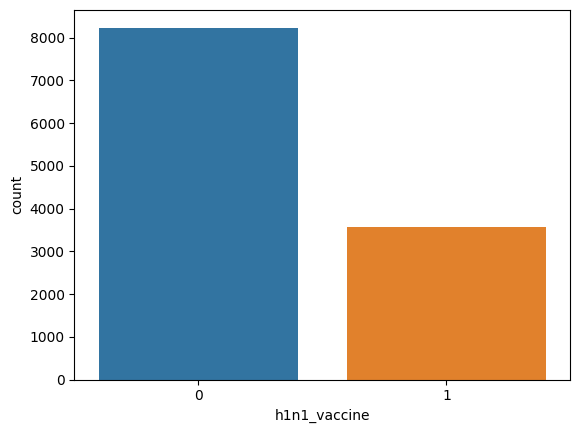

In [ ]:
# Plotting the results
sns.countplot(x="h1n1_vaccine", data=df)
plt.show()

In [6]:
# Loading the dataset again
df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

# Handling missing values by dropping rows with missing values
df = df.dropna()

# Encoding categorical variables (re-running this step)
le = LabelEncoder()
df["age_bracket"] = le.fit_transform(df["age_bracket"])
df["qualification"] = le.fit_transform(df["qualification"])
df["race"] = le.fit_transform(df["race"])
df["sex"] = le.fit_transform(df["sex"])
df["income_level"] = le.fit_transform(df["income_level"])
df["marital_status"] = le.fit_transform(df["marital_status"])
df["housing_status"] = le.fit_transform(df["housing_status"])
df["employment"] = le.fit_transform(df["employment"])
df["census_msa"] = le.fit_transform(df["census_msa"])

# Feature selection (corrected code)
X = df.drop(["h1n1_vaccine"], axis=1)
y = df["h1n1_vaccine"]

# Train-test split (re-running this step)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a StandardScaler object (re-running this step)
scaler = StandardScaler()

# fit and transform the training data (re-running this step)
X_train = scaler.fit_transform(X_train)

# transform the test data (re-running this step)
X_test = scaler.transform(X_test)

# create a Logistic Regression object and fit the model (re-running this step)
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict on the test data (re-running this step)
y_pred = lr.predict(X_test)

# Model building (re-running this step)
model = LogisticRegression()
model.fit(X_train, y_train)

# Model evaluation (re-running this step)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1652
           1       0.74      0.58      0.65       707

    accuracy                           0.81      2359
   macro avg       0.79      0.74      0.76      2359
weighted avg       0.81      0.81      0.80      2359



In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset again
df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

# Handling missing values by dropping rows with missing values
df = df.dropna()

# Encoding categorical variables (re-running this step)
le = LabelEncoder()
df["age_bracket"] = le.fit_transform(df["age_bracket"])
df["qualification"] = le.fit_transform(df["qualification"])
df["race"] = le.fit_transform(df["race"])
df["sex"] = le.fit_transform(df["sex"])
df["income_level"] = le.fit_transform(df["income_level"])
df["marital_status"] = le.fit_transform(df["marital_status"])
df["housing_status"] = le.fit_transform(df["housing_status"])
df["employment"] = le.fit_transform(df["employment"])
df["census_msa"] = le.fit_transform(df["census_msa"])

# Feature selection (corrected code)
X = df.drop(["h1n1_vaccine"], axis=1)
y = df["h1n1_vaccine"]

# Train-test split (re-running this step)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a StandardScaler object (re-running this step)
scaler = StandardScaler()

# fit and transform the training data (re-running this step)
X_train = scaler.fit_transform(X_train)

# transform the test data (re-running this step)
X_test = scaler.transform(X_test)

# create a Logistic Regression object and fit the model (re-running this step)
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict on the test data (re-running this step)
y_pred = lr.predict(X_test)

# Model building (re-running this step)
model = LogisticRegression()
model.fit(X_train, y_train)

# Model evaluation (re-running this step)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1652
           1       0.74      0.58      0.65       707

    accuracy                           0.81      2359
   macro avg       0.79      0.74      0.76      2359
weighted avg       0.81      0.81      0.80      2359

